<a href="https://colab.research.google.com/github/Carusof24/nucleation/blob/main/Copia_di_pe_nuc_analisi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/progetto nucleazione/lalalamps/dati_54/pe_54"


 pe_nuc_10.dat	     pe_nuc_17.dat	  pe_nuc_2.dat	      pe_nuc_6.dat
 pe_nuc_11.dat	    'pe_nuc_18 (1).dat'  'pe_nuc_3 (1).dat'  'pe_nuc_7 (1).dat'
'pe_nuc_1 (1).dat'   pe_nuc_18.dat	  pe_nuc_3.dat	      pe_nuc_7.dat
 pe_nuc_12.dat	     pe_nuc_19.dat	 'pe_nuc_4 (1).dat'   pe_nuc_8.dat
 pe_nuc_13.dat	     pe_nuc_1.dat	  pe_nuc_4.dat	      pe_nuc_9.dat
 pe_nuc_14.dat	    'pe_nuc_20 (1).dat'  'pe_nuc_5 (1).dat'
 pe_nuc_15.dat	     pe_nuc_20.dat	  pe_nuc_5.dat
 pe_nuc_16.dat	    'pe_nuc_2 (1).dat'	 'pe_nuc_6 (1).dat'


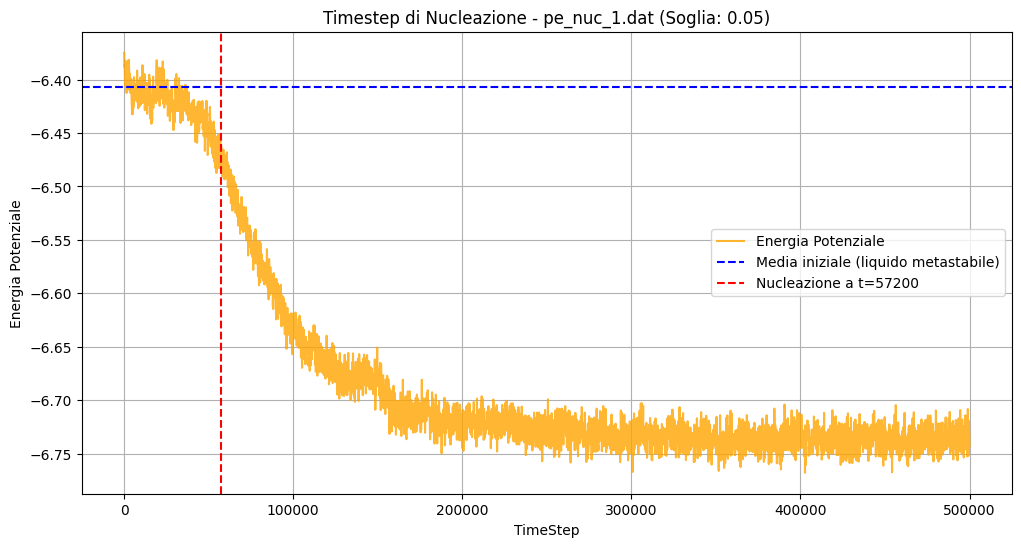

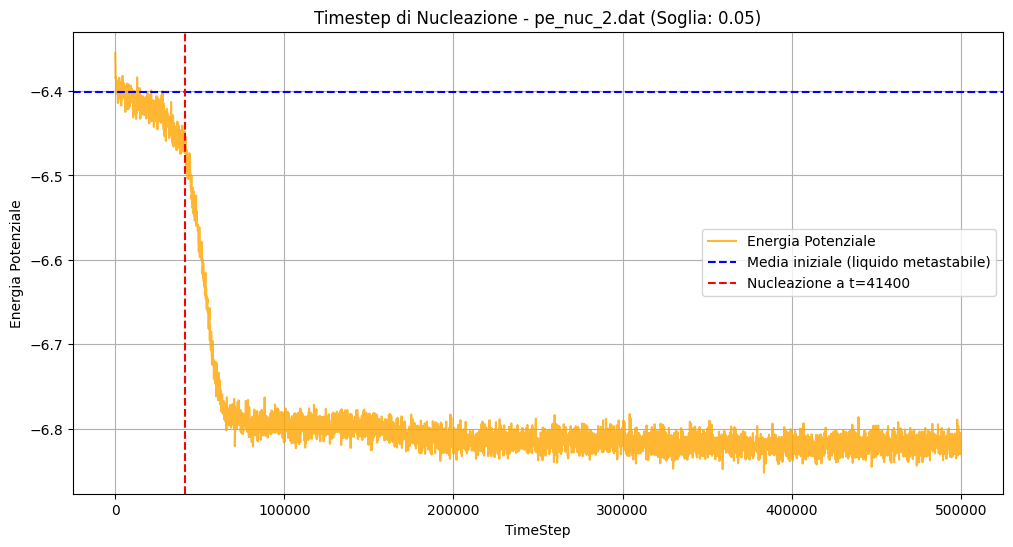

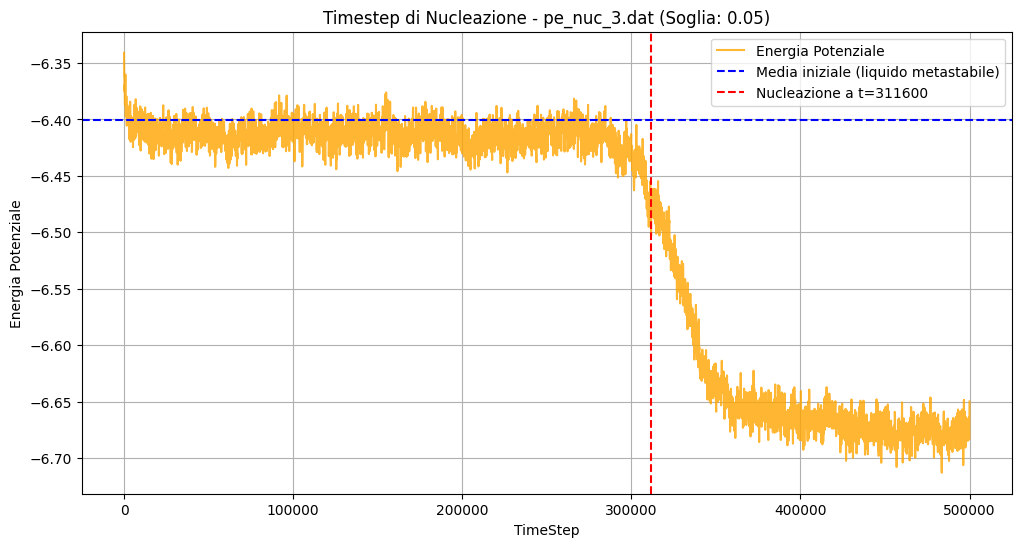

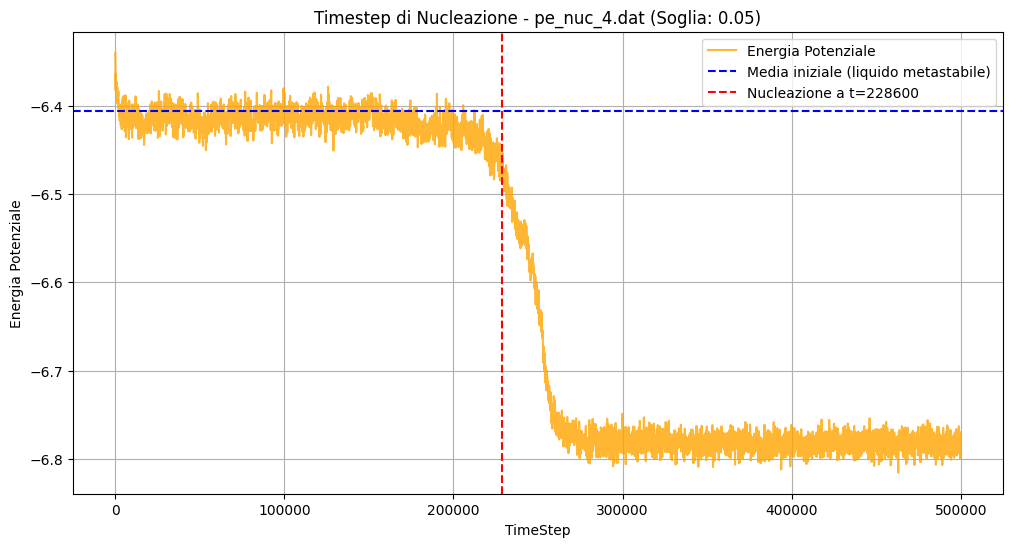

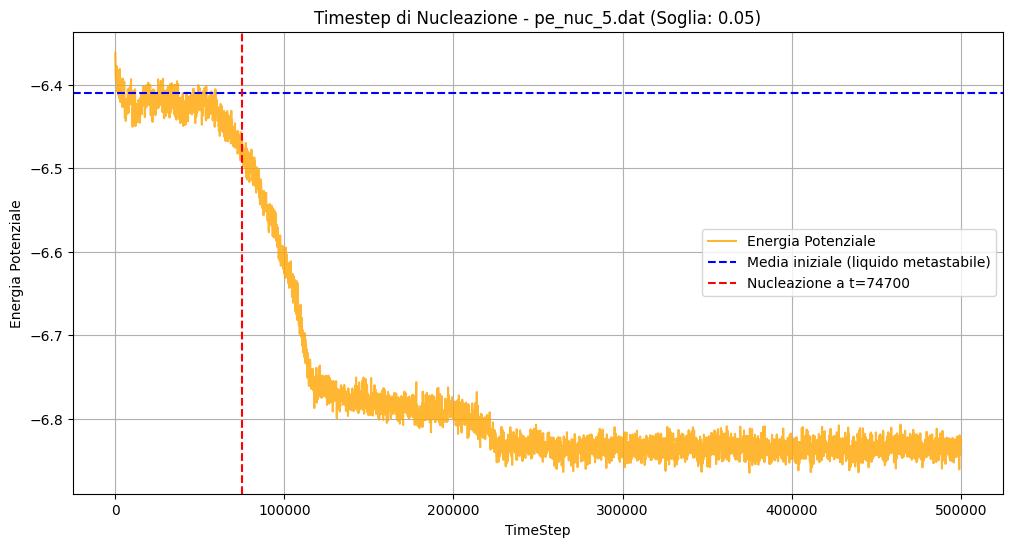

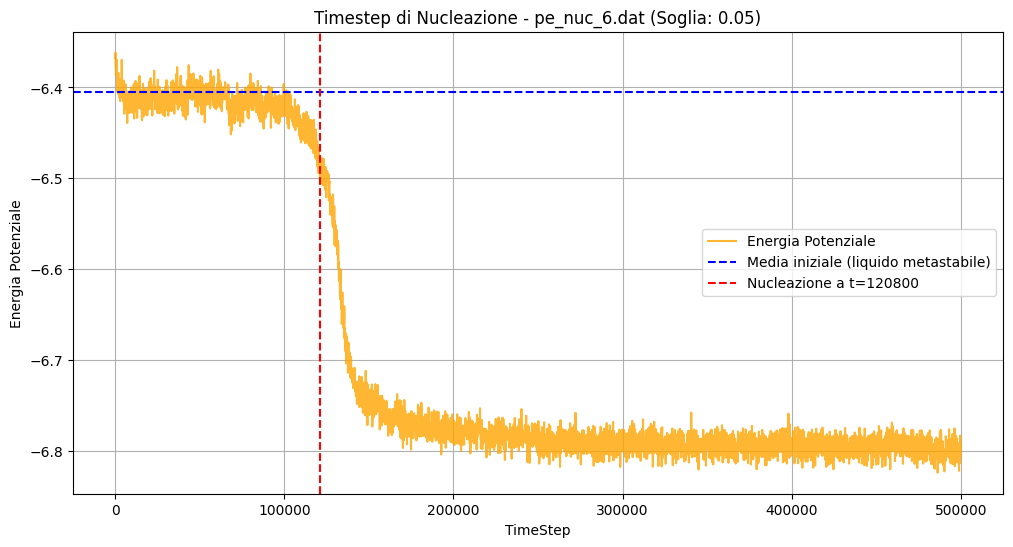

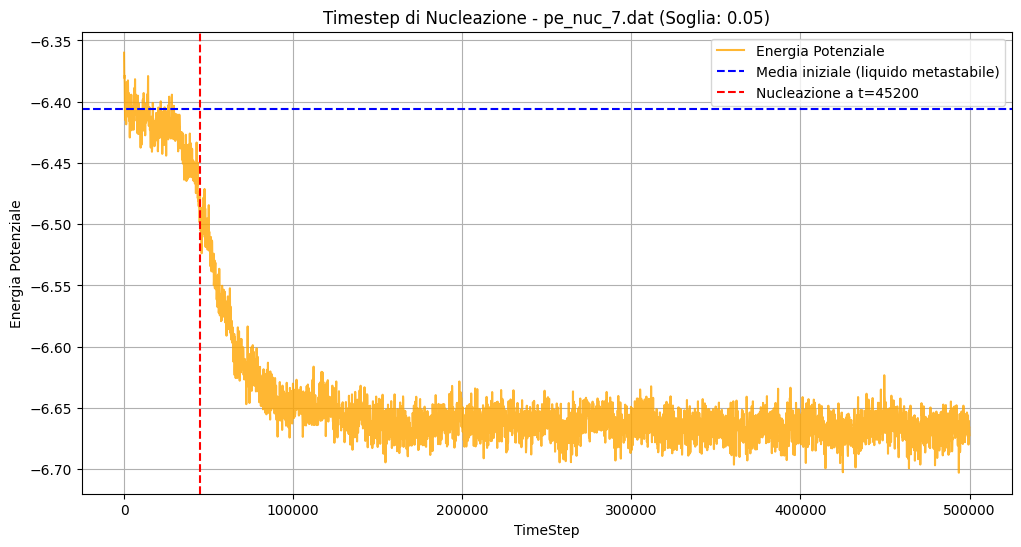

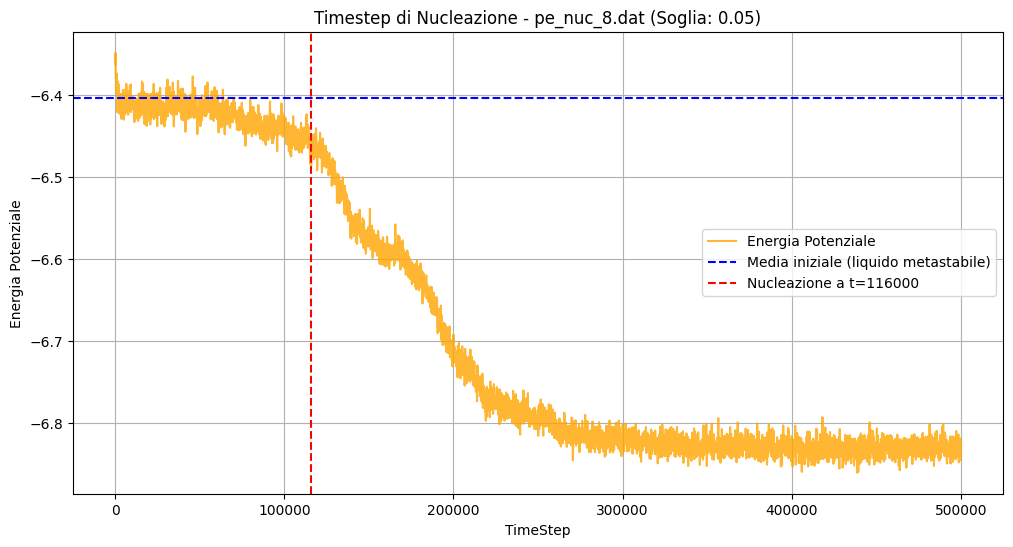

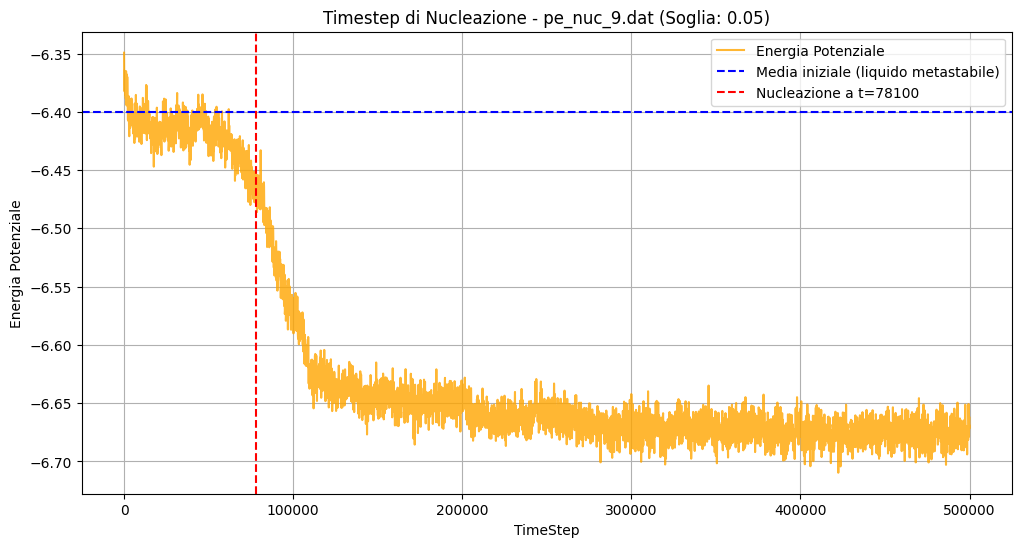

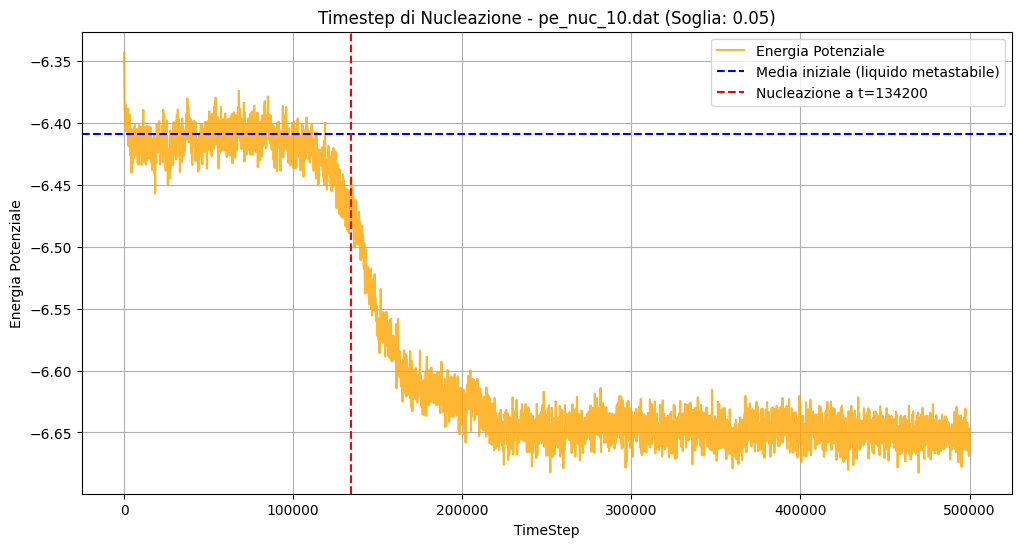

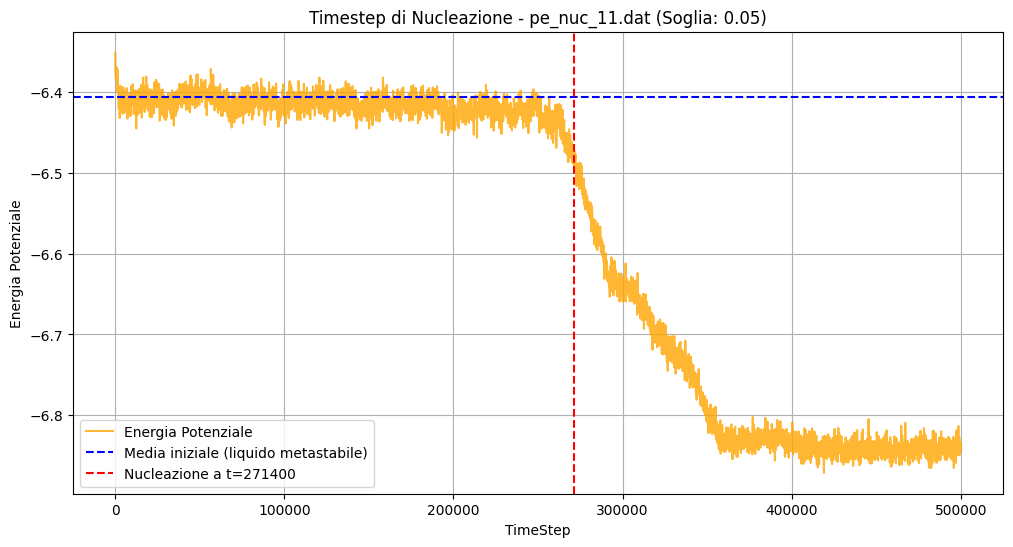

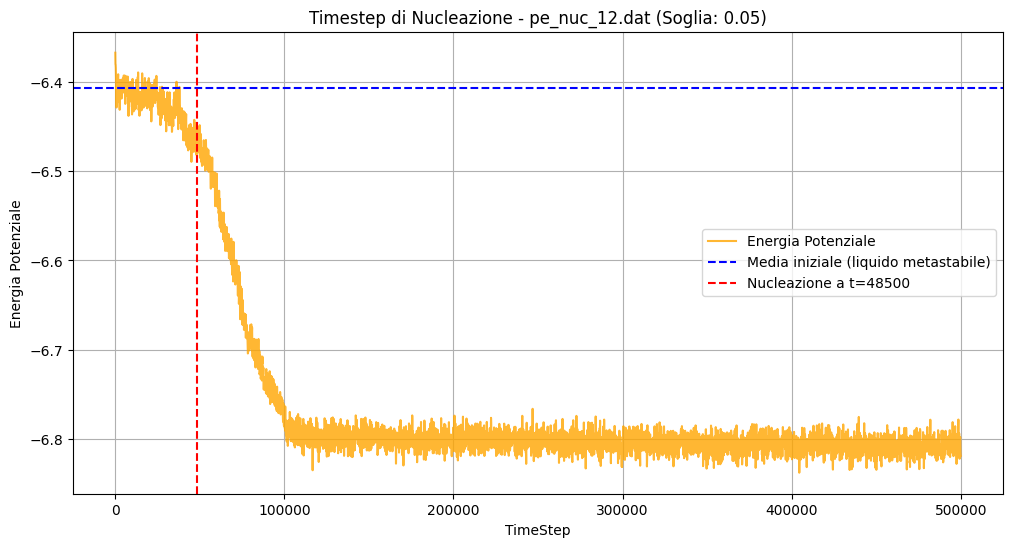

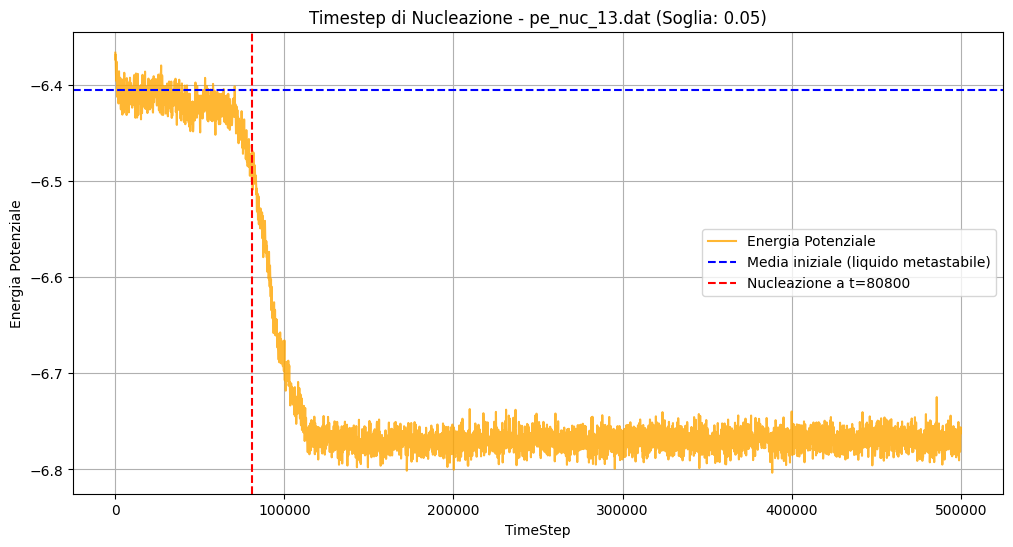

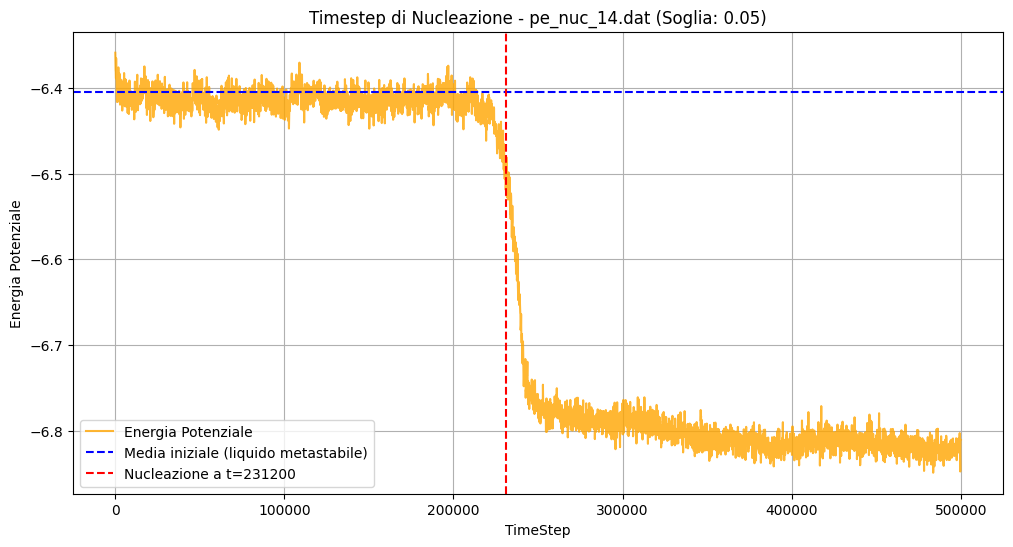

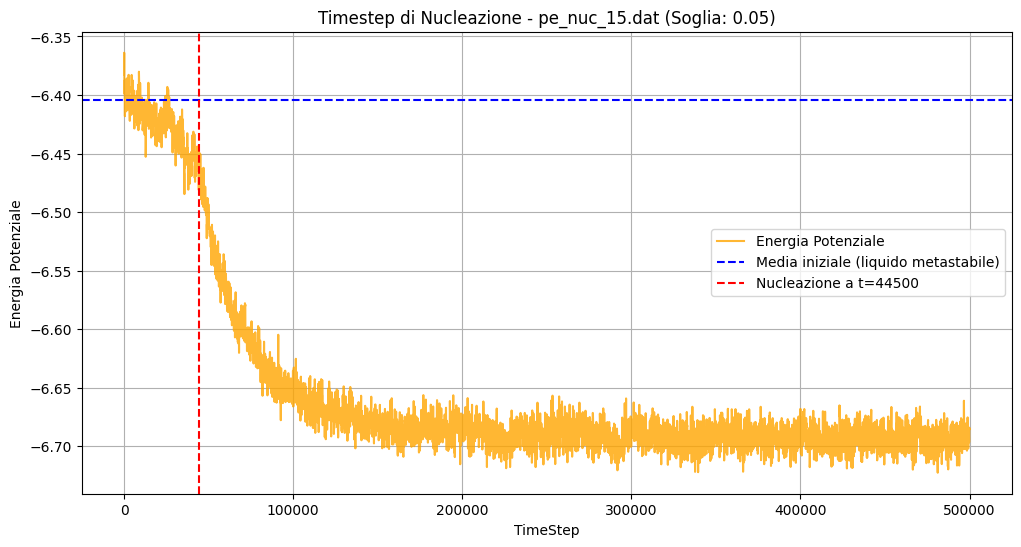

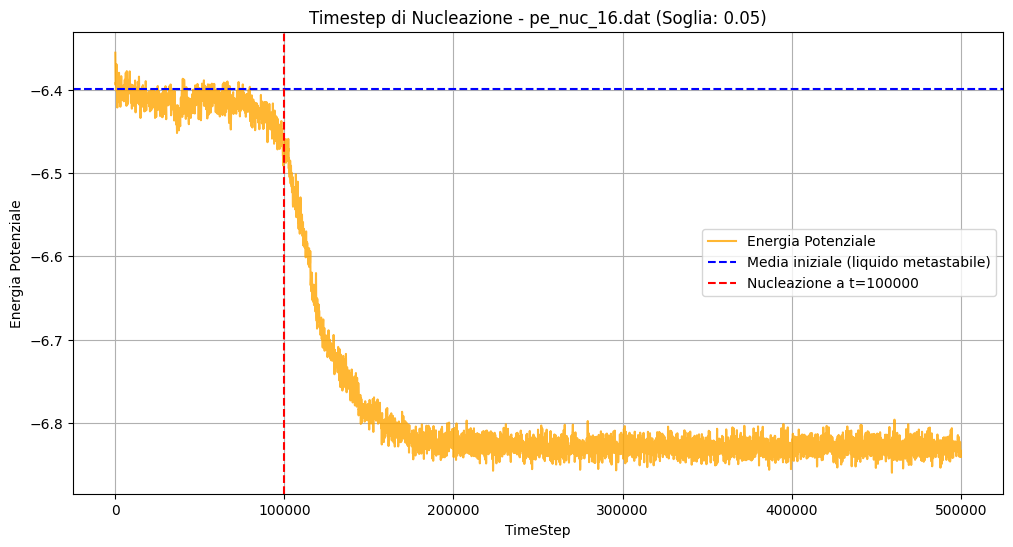

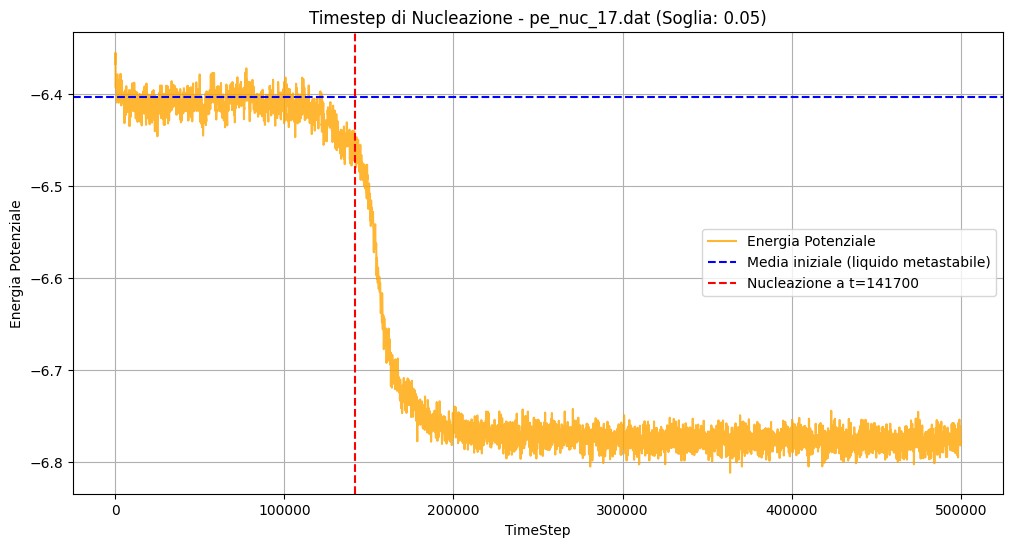

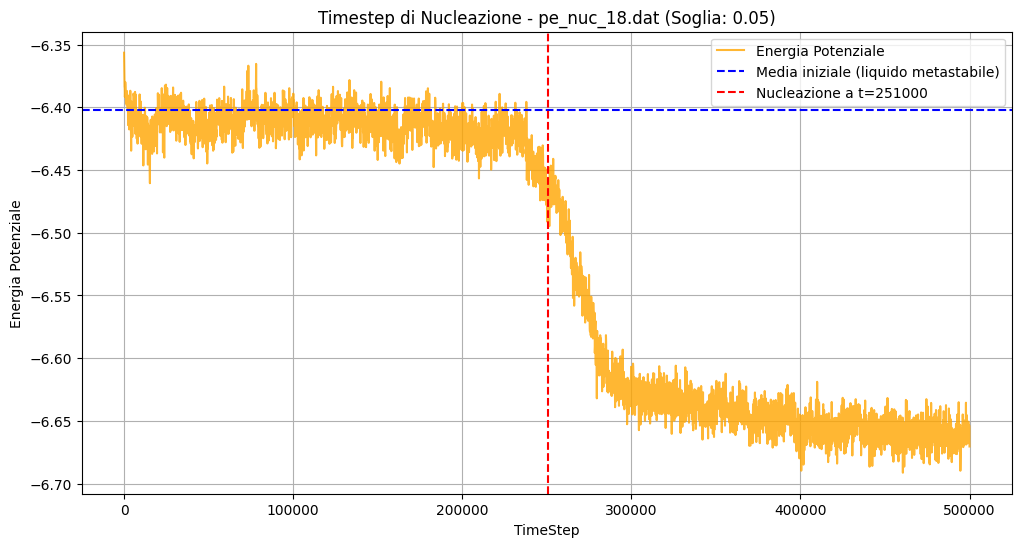

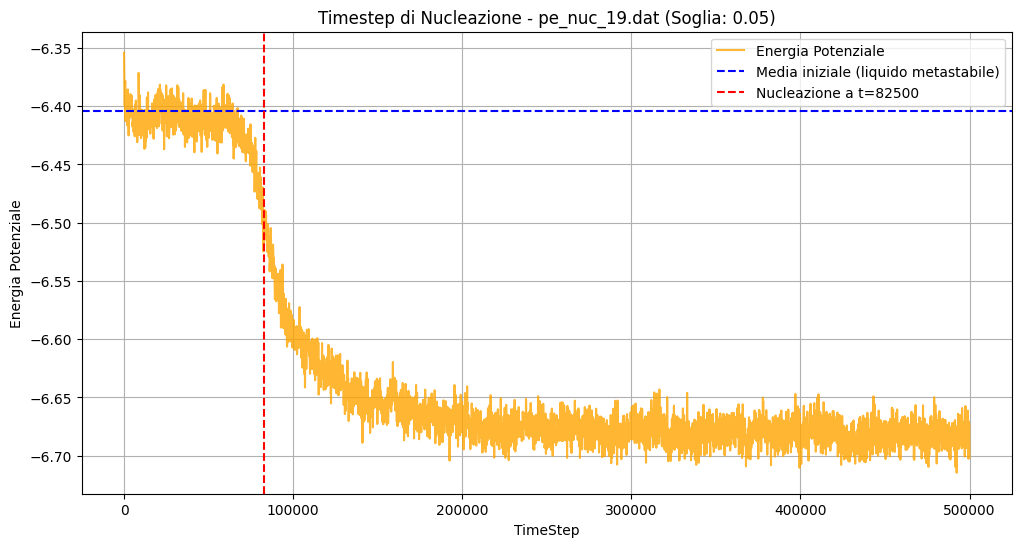

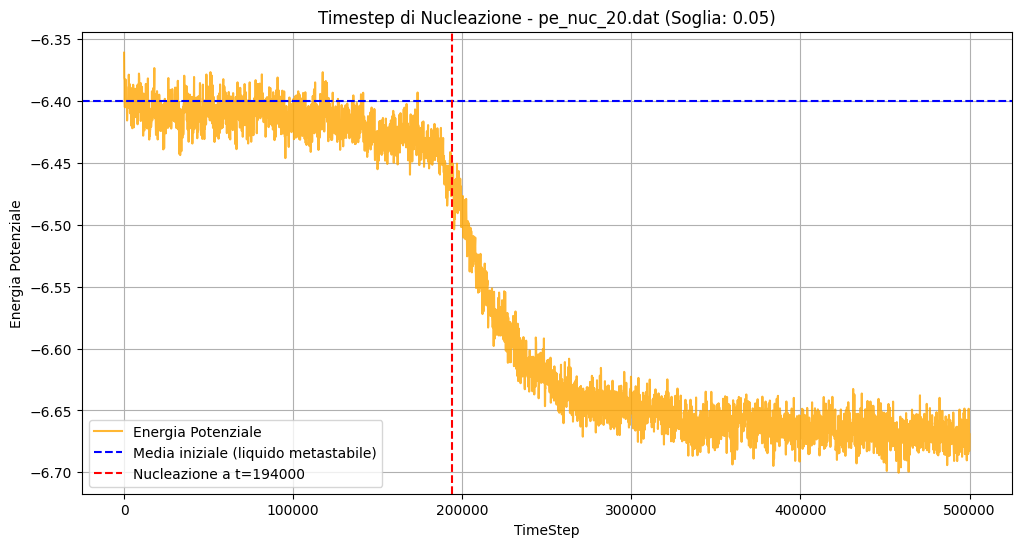

Tempi di nucleazione salvati in: /content/drive/My Drive/progetto nucleazione/nucleation_times.txt


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Percorso dei file
base_path = "/content/drive/My Drive/progetto nucleazione/lalalamps/dati_54/pe_54/"
file_list = [f"{base_path}pe_nuc_{i}.dat" for i in range(1, 21)]

# Parametri per identificare la nucleazione
energy_threshold = 0.05  # Soglia per variazione energia
window_size = 100  # Dimensione finestra per la media mobile

# Lista per salvare i risultati
nucleation_times = []

# Funzione per identificare il tempo di nucleazione
def find_nucleation_time(time_steps, energies, energy_threshold, window_size):
    initial_mean = np.mean(energies[:window_size])
    for i in range(window_size, len(energies)):
        local_mean = np.mean(energies[i-window_size:i])
        if abs(local_mean - initial_mean) > energy_threshold:
            return time_steps[i]
    return None

# Elaborazione di tutti i file
for file_path in file_list:
    time_steps = []
    energies = []

    try:
        with open(file_path, 'r') as f:
            for line in f:
                if line.strip().startswith('#') or len(line.strip()) == 0:
                    continue
                parts = line.split()
                if len(parts) == 2:
                    time_steps.append(float(parts[0]))
                    energies.append(float(parts[1]))

        time_steps = np.array(time_steps)
        energies = np.array(energies)

        nucleation_time = find_nucleation_time(time_steps, energies, energy_threshold, window_size)
        nucleation_times.append((file_path, nucleation_time))

        # Visualizzazione per ogni simulazione
        plt.figure(figsize=(12, 6))
        plt.plot(time_steps, energies, label="Energia Potenziale", color="orange", alpha=0.8)
        plt.axhline(y=np.mean(energies[:window_size]), color='blue', linestyle='--', label="Media iniziale (liquido metastabile)")
        if nucleation_time:
            plt.axvline(x=nucleation_time, color='red', linestyle='--', label=f'Nucleazione a t={nucleation_time:.0f}')
        plt.xlabel("TimeStep")
        plt.ylabel("Energia Potenziale")
        plt.title(f"Timestep di Nucleazione - {file_path.split('/')[-1]} (Soglia: {energy_threshold})")
        plt.legend()
        plt.grid(True)
        plt.show()

    except FileNotFoundError:
        print(f"File non trovato: {file_path}")
        nucleation_times.append((file_path, None))

# Salvataggio dei risultati in un file
output_file = "/content/drive/My Drive/progetto nucleazione/nucleation_times.txt"
with open(output_file, 'w') as f:
    for file_path, nucleation_time in nucleation_times:
        simulation_name = file_path.split('/')[-1]
        if nucleation_time:
            f.write(f"{simulation_name}: {nucleation_time}\n")
        else:
            f.write(f"{simulation_name}: Nessuna nucleazione rilevata\n")

print(f"Tempi di nucleazione salvati in: {output_file}")


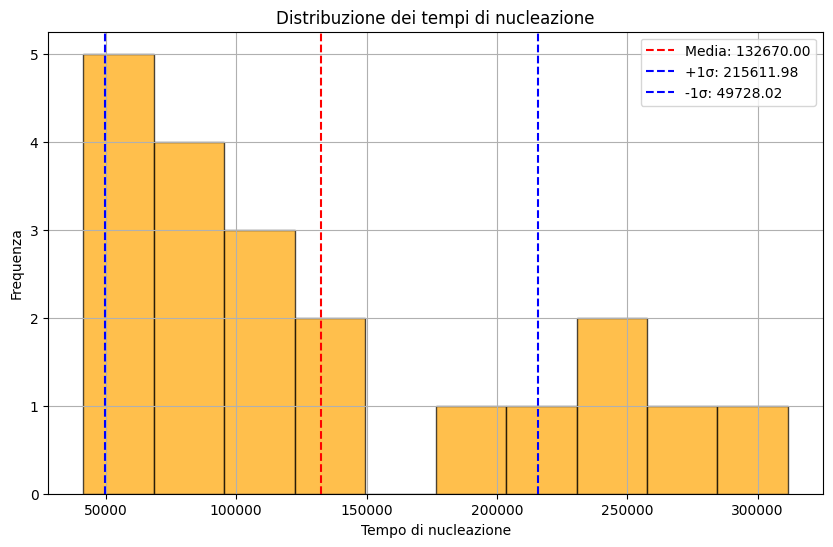

Media dei tempi di nucleazione: 132670.00
Deviazione standard: 82941.98


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Percorso del file con i tempi di nucleazione
input_file = "/content/drive/My Drive/progetto nucleazione/nucleation_times.txt"

# Caricamento dei tempi di nucleazione dal file
nucleation_times = []
with open(input_file, 'r') as f:
    for line in f:
        if "Nessuna nucleazione rilevata" not in line:
            time = float(line.split(":")[1].strip())
            nucleation_times.append(time)

# Converti in array numpy per facilità
nucleation_times = np.array(nucleation_times)

# Calcolo dei parametri della distribuzione
mean_time = np.mean(nucleation_times)
std_dev = np.std(nucleation_times)

# Plot dell'istogramma
plt.figure(figsize=(10, 6))
plt.hist(nucleation_times, bins=10, color='orange', edgecolor='black', alpha=0.7)
plt.axvline(mean_time, color='red', linestyle='--', label=f"Media: {mean_time:.2f}")
plt.axvline(mean_time + std_dev, color='blue', linestyle='--', label=f"+1σ: {mean_time + std_dev:.2f}")
plt.axvline(mean_time - std_dev, color='blue', linestyle='--', label=f"-1σ: {mean_time - std_dev:.2f}")

# Etichette e titolo
plt.xlabel("Tempo di nucleazione")
plt.ylabel("Frequenza")
plt.title("Distribuzione dei tempi di nucleazione")
plt.legend()
plt.grid(True)
plt.show()

# Stampa dei risultati
print(f"Media dei tempi di nucleazione: {mean_time:.2f}")
print(f"Deviazione standard: {std_dev:.2f}")



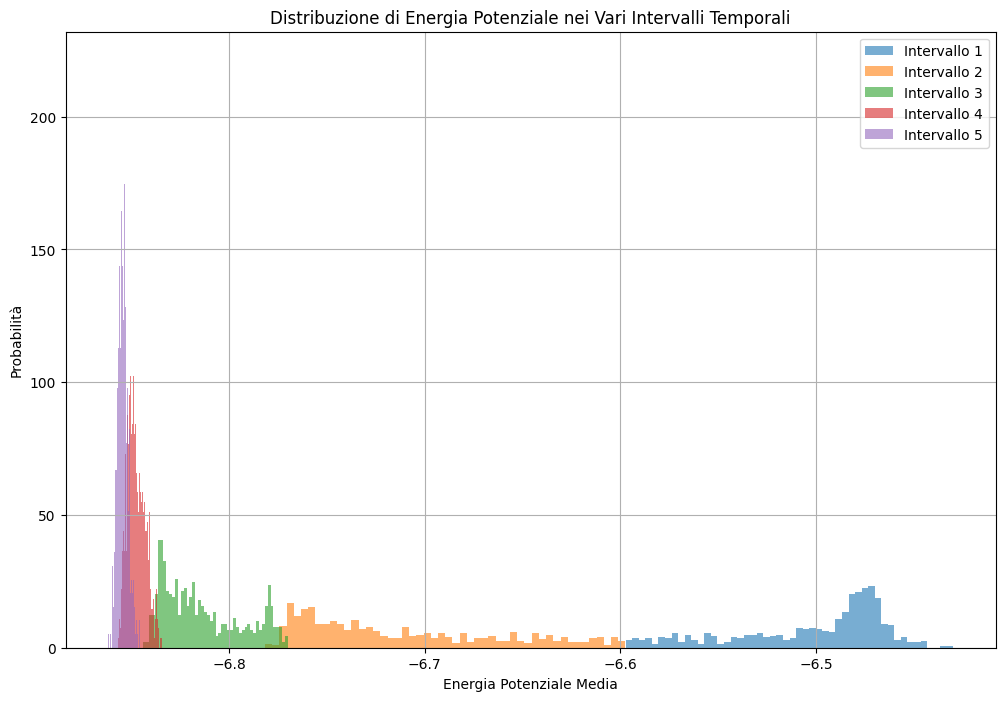

In [ ]:
import glob
import numpy as np
import matplotlib.pyplot as plt


# Specifica il percorso della directory
data_path = "/content/drive/My Drive/progetto nucleazione/nuovi_dati/dati_50/pe_50/"

# Trova tutti i file che corrispondono al pattern
file_list = glob.glob(data_path + "pe_nuc*.dat")
file_list.sort()

replica_data = []

for fname in file_list:
    timesteps = []
    energies = []
    with open(fname, 'r') as f:
        for line in f:
            if line.strip().startswith('#'):
                continue
            parts = line.split()
            if len(parts) == 2:
                t = float(parts[0])
                energy = float(parts[1])
                timesteps.append(t)
                energies.append(energy)
    timesteps = np.array(timesteps)
    energies = np.array(energies)
    replica_data.append((timesteps, energies))

# Trova la lunghezza minima delle repliche
min_length = min([len(rep[0]) for rep in replica_data])

# Trunca i dati alla lunghezza minima
for i in range(len(replica_data)):
    timesteps_i, energies_i = replica_data[i]
    timesteps_i = timesteps_i[:min_length]
    energies_i = energies_i[:min_length]
    replica_data[i] = (timesteps_i, energies_i)

# Dati di energia media su tutte le repliche
all_energies = np.array([rep[1] for rep in replica_data])
mean_energies = np.mean(all_energies, axis=0)

# Dividi i dati temporali in intervalli
num_intervals = 5
interval_length = min_length // num_intervals

# Crea istogrammi per ciascun intervallo
plt.figure(figsize=(12, 8))
for i in range(num_intervals):
    start = i * interval_length
    end = (i + 1) * interval_length
    interval_energies = mean_energies[start:end]

    plt.hist(interval_energies, bins=50, alpha=0.6, density=True, label=f"Intervallo {i + 1}")

plt.xlabel("Energia Potenziale Media")
plt.ylabel("Probabilità")
plt.title("Distribuzione di Energia Potenziale nei Vari Intervalli Temporali")
plt.legend()
plt.grid(True)
plt.show()


Trovati 20 file.
Tempo medio di nucleazione: 0.00
Deviazione standard del tempo di nucleazione: 0.00


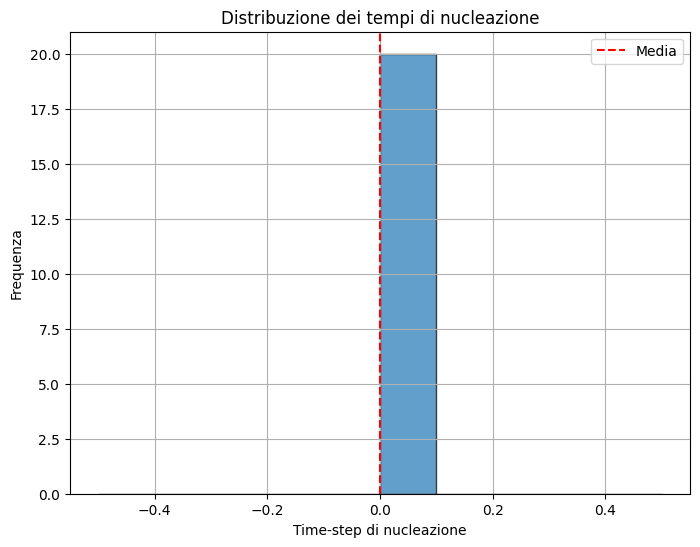

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob

# Specifica il percorso della directory con i dati
data_path = "/content/drive/My Drive/progetto nucleazione/nuovi_dati/dati_50/pe_50/"

# Trova tutti i file che corrispondono al pattern
file_list = glob.glob(data_path + "pe_nuc*.dat")
file_list.sort()

print(f"Trovati {len(file_list)} file.")

# Lista per salvare i tempi di nucleazione
nucleation_times = []

# Funzione per identificare il time-step di nucleazione
def find_nucleation_time(timesteps, energies, drop_factor=0.2):
    """
    Identifica il time-step in cui l'energia scende sotto una frazione specificata del valore iniziale.
    - `drop_factor`: frazione dell'energia iniziale che indica il calo significativo.
    """
    initial_energy = np.mean(energies[:10000])  # Energia media iniziale (primi 100 punti)
    threshold_energy = initial_energy * drop_factor

    # Trova il primo indice in cui l'energia è sotto la soglia
    nucleation_index = np.where(energies < threshold_energy)[0]
    if len(nucleation_index) > 0:
        return timesteps[nucleation_index[0]]  # Ritorna il time-step corrispondente
    else:
        return None  # Nessun evento di nucleazione trovato

# Analizza ciascuna replica
for fname in file_list:
    timesteps = []
    energies = []
    with open(fname, 'r') as f:
        for line in f:
            if line.strip().startswith('#'):  # Ignora commenti
                continue
            parts = line.split()
            if len(parts) == 2:
                t = float(parts[0])
                energy = float(parts[1])
                timesteps.append(t)
                energies.append(energy)
    timesteps = np.array(timesteps)
    energies = np.array(energies)

    # Trova il time-step di nucleazione
    nucleation_time = find_nucleation_time(timesteps, energies)
    if nucleation_time is not None:
        nucleation_times.append(nucleation_time)

# Calcola il tempo medio di nucleazione
if len(nucleation_times) > 0:
    mean_nucleation_time = np.mean(nucleation_times)
    std_nucleation_time = np.std(nucleation_times)

    print(f"Tempo medio di nucleazione: {mean_nucleation_time:.2f}")
    print(f"Deviazione standard del tempo di nucleazione: {std_nucleation_time:.2f}")
else:
    print("Nessun evento di nucleazione trovato in nessuna replica.")

# Grafico dei tempi di nucleazione
plt.figure(figsize=(8, 6))
plt.hist(nucleation_times, bins=10, edgecolor='black', alpha=0.7)
plt.axvline(mean_nucleation_time, color='r', linestyle='--', label='Media')
plt.xlabel("Time-step di nucleazione")
plt.ylabel("Frequenza")
plt.title("Distribuzione dei tempi di nucleazione")
plt.legend()
plt.grid(True)
plt.show()



Trovati 20 file.


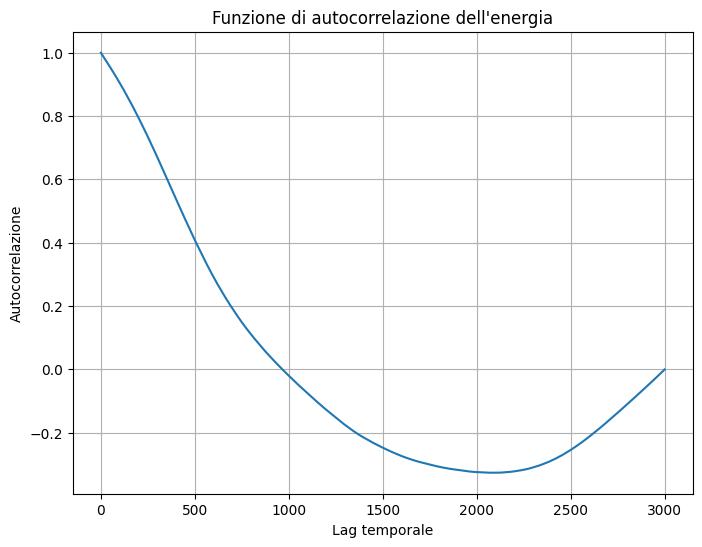

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from scipy.signal import correlate

# Specifica il percorso della directory con i dati
data_path = "/content/drive/My Drive/progetto nucleazione/nuovi_dati/dati_50/pe_50/"

# Trova tutti i file che corrispondono al pattern
file_list = glob.glob(data_path + "pe_nuc*.dat")
file_list.sort()  # Ordina i file trovati

print(f"Trovati {len(file_list)} file.")

# Lista per i dati caricati
replica_data = []

# Carica i dati da ciascun file
for fname in file_list:
    timesteps = []
    energies = []
    with open(fname, 'r') as f:
        for line in f:
            if line.strip().startswith('#'):  # Ignora i commenti
                continue
            parts = line.split()
            if len(parts) == 2:
                t = float(parts[0])
                energy = float(parts[1])
                timesteps.append(t)
                energies.append(energy)
    timesteps = np.array(timesteps)
    energies = np.array(energies)
    replica_data.append((timesteps, energies))

# Trova la lunghezza minima per allineare i dati
min_length = min([len(rep[0]) for rep in replica_data])

# Trunca i dati alla lunghezza minima
for i in range(len(replica_data)):
    timesteps_i, energies_i = replica_data[i]
    timesteps_i = timesteps_i[:min_length]
    energies_i = energies_i[:min_length]
    replica_data[i] = (timesteps_i, energies_i)

# Calcola l'energia media temporale su tutte le repliche
all_energies = np.array([rep[1] for rep in replica_data])
mean_energy_time = np.mean(all_energies, axis=0)

# Calcolo dell'autocorrelazione
autocorr = correlate(mean_energy_time - np.mean(mean_energy_time),
                     mean_energy_time - np.mean(mean_energy_time),
                     mode='full')
autocorr = autocorr[autocorr.size // 2:]  # Prendi solo la metà positiva
autocorr /= autocorr[0]  # Normalizza

# Grafico dell'autocorrelazione
plt.figure(figsize=(8, 6))
plt.plot(autocorr)
plt.xlabel('Lag temporale')
plt.ylabel('Autocorrelazione')
plt.title('Funzione di autocorrelazione dell\'energia')
plt.grid(True)
plt.show()


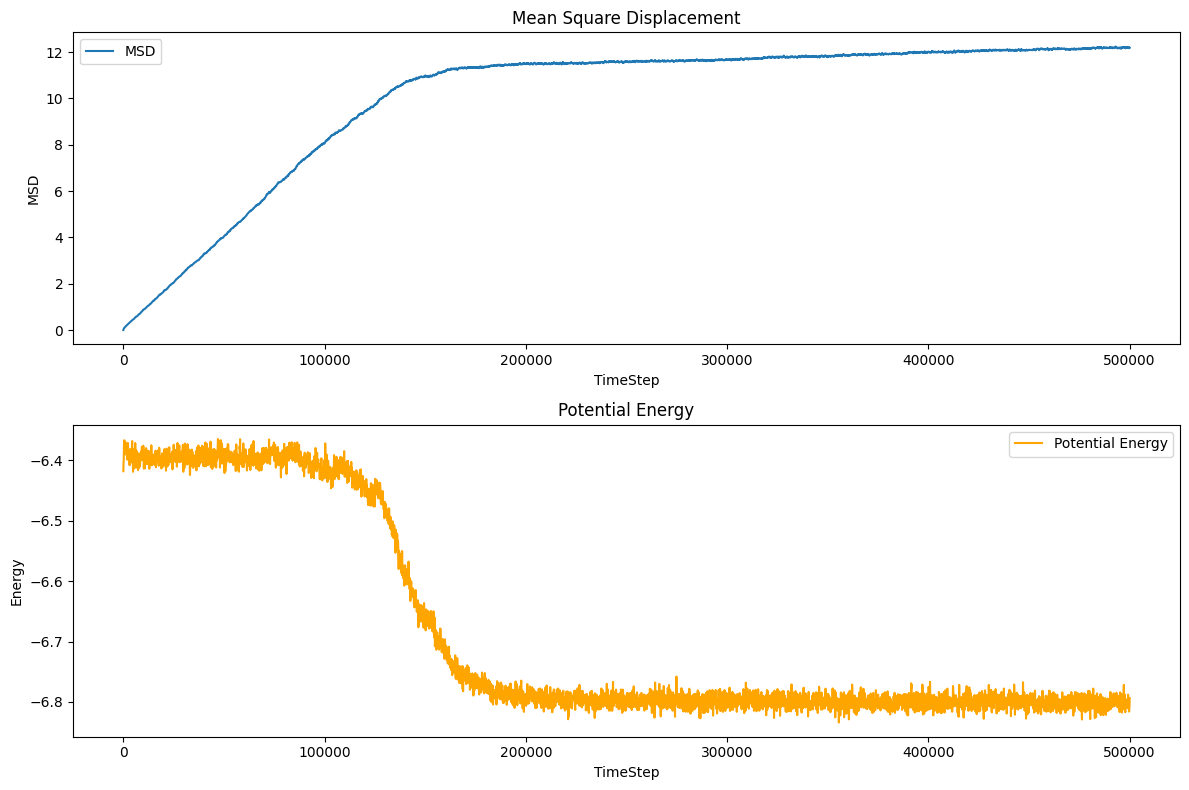

In [ ]:
# VISUALIZZIAMO
# Percorsi dei file di dati - CAMBIARE QUI PER VISUALIZZARE DETERMINATO FILE

msd_file = "/content/drive/My Drive/progetto nucleazione/nuovi_dati/dati_50/msd_50//msd_nuc_1.dat"
potential_energy_file = "/content/drive/My Drive/progetto nucleazione/nuovi_dati/dati_50/pe_50/pe_nuc_1.dat"

def read_data(file_path):
    """Legge i dati dal file ignorando le righe di commento."""
    with open(file_path, 'r') as file:
        lines = file.readlines()
    data = [line.strip().split() for line in lines if not line.startswith("#")]
    return pd.DataFrame(data, columns=['TimeStep', 'Value']).astype(float)

# Lettura dei dati
msd_data = read_data(msd_file)
potential_energy_data = read_data(potential_energy_file)

# Tracciamento dei grafici
plt.figure(figsize=(12, 8))

# Plot del Mean Square Displacement (MSD)
plt.subplot(2, 1, 1)
plt.plot(msd_data['TimeStep'], msd_data['Value'], label='MSD')
plt.xlabel('TimeStep')
plt.ylabel('MSD')
plt.title('Mean Square Displacement')
plt.legend()

# Plot dell'energia potenziale
plt.subplot(2, 1, 2)
plt.plot(potential_energy_data['TimeStep'], potential_energy_data['Value'], label='Potential Energy', color='orange')
plt.xlabel('TimeStep')
plt.ylabel('Energy')
plt.title('Potential Energy')
plt.legend()



# Mostrare i grafici
plt.tight_layout()
plt.show()


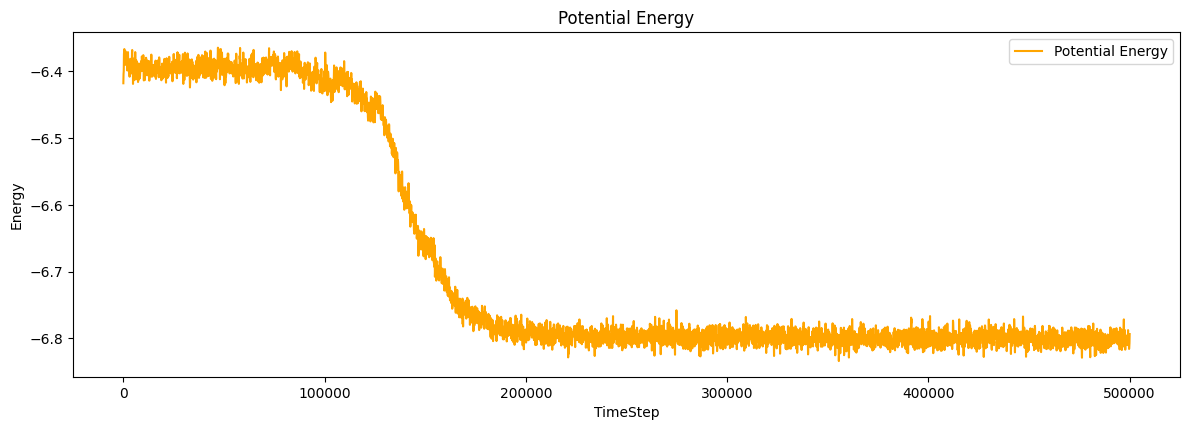

In [ ]:
# VISUALIZZIAMO
# Percorsi dei file di dati - CAMBIARE QUI PER VISUALIZZARE DETERMINATO FILE


potential_energy_file = "/content/drive/My Drive/progetto nucleazione/nuovi_dati/dati_50/pe_50/pe_nuc_1.dat"

def read_data(file_path):
    """Legge i dati dal file ignorando le righe di commento."""
    with open(file_path, 'r') as file:
        lines = file.readlines()
    data = [line.strip().split() for line in lines if not line.startswith("#")]
    return pd.DataFrame(data, columns=['TimeStep', 'Value']).astype(float)


potential_energy_data = read_data(potential_energy_file)

# Tracciamento dei grafici
plt.figure(figsize=(12, 8))

# Plot del Mean Square Displacement (MSD)

# Plot dell'energia potenziale
plt.subplot(2, 1, 2)
plt.plot(potential_energy_data['TimeStep'], potential_energy_data['Value'], label='Potential Energy', color='orange')
plt.xlabel('TimeStep')
plt.ylabel('Energy')
plt.title('Potential Energy')
plt.legend()



# Mostrare i grafici
plt.tight_layout()
plt.show()


Non è stato possibile identificare la nucleazione con la soglia specificata.


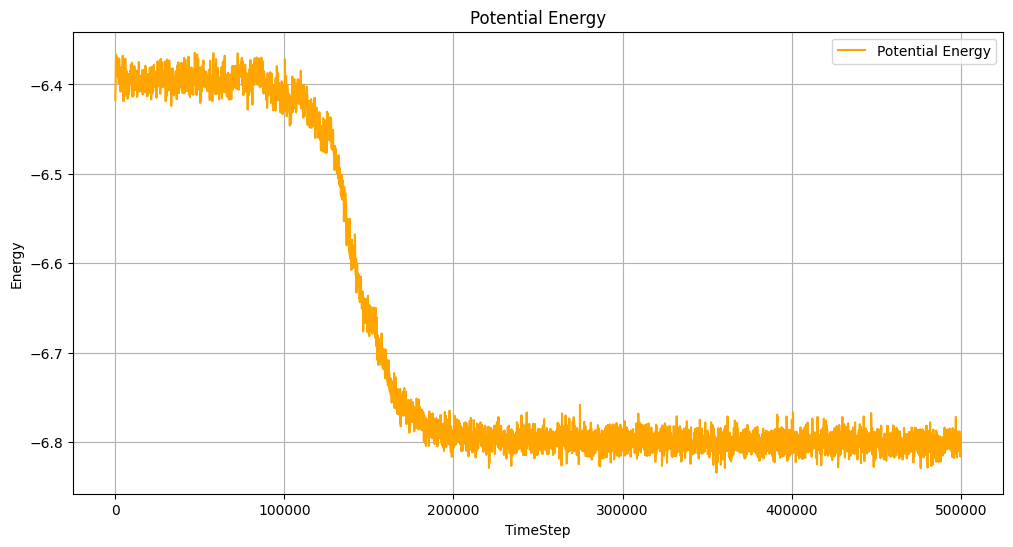

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Carica i dati dal file (sostituisci con il percorso reale del file)
file_path = "/content/drive/My Drive/progetto nucleazione/nuovi_dati/dati_50/pe_50/pe_nuc_1.dat"

# Leggi i dati
timesteps = []
energies = []
with open(file_path, 'r') as f:
    for line in f:
        if line.strip().startswith('#'):  # Ignora commenti
            continue
        parts = line.split()
        if len(parts) == 2:
            timesteps.append(float(parts[0]))
            energies.append(float(parts[1]))

timesteps = np.array(timesteps)
energies = np.array(energies)

# Calcolo della derivata numerica dell'energia
energy_derivative = np.diff(energies) / np.diff(timesteps)

# Soglia per identificare la nucleazione (valore da regolare se necessario)
threshold = - 0.1  # Valore negativo perché l'energia decresce

# Trova il primo indice in cui la derivata è inferiore alla soglia
nucleation_index = np.where(energy_derivative < threshold)[0]
if len(nucleation_index) > 0:
    nucleation_timestep = timesteps[nucleation_index[0] + 1]  # +1 per allineare con np.diff
    print(f"La nucleazione avviene intorno al time-step: {nucleation_timestep}")
else:
    print("Non è stato possibile identificare la nucleazione con la soglia specificata.")

# Grafico
plt.figure(figsize=(12, 6))
plt.plot(timesteps, energies, label="Potential Energy", color='orange')
if len(nucleation_index) > 0:
    plt.axvline(nucleation_timestep, color='red', linestyle='--', label="Nucleation Point")
plt.xlabel("TimeStep")
plt.ylabel("Energy")
plt.title("Potential Energy")
plt.legend()
plt.grid(True)
plt.show()


La nucleazione avviene intorno al time-step: 139600.0


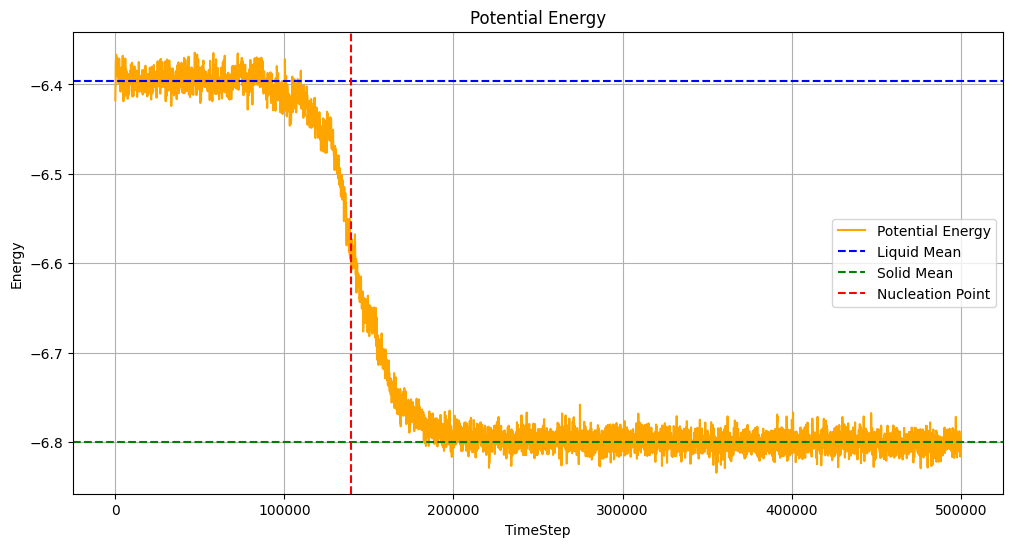

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Carica i dati dal file
file_path = "/content/drive/My Drive/progetto nucleazione/lalalamps/dati_50/pe_50/pe_nuc_1.dat"

# Leggi i dati
timesteps = []
energies = []
with open(file_path, 'r') as f:
    for line in f:
        if line.strip().startswith('#'):  # Ignora commenti
            continue
        parts = line.split()
        if len(parts) == 2:
            timesteps.append(float(parts[0]))
            energies.append(float(parts[1]))

timesteps = np.array(timesteps)
energies = np.array(energies)

# Determina i regimi liquido e cristallino
liquid_phase = energies[timesteps < 100000]  # Energia prima della nucleazione
solid_phase = energies[timesteps > 400000]  # Energia dopo la nucleazione

# Calcola i valori medi per liquido e cristallino
liquid_mean = np.mean(liquid_phase)
solid_mean = np.mean(solid_phase)

# Imposta una soglia intermedia
threshold = (liquid_mean + solid_mean) / 2

# Trova il primo time-step in cui l'energia scende sotto la soglia
nucleation_index = np.where(energies < threshold)[0]
if len(nucleation_index) > 0:
    nucleation_timestep = timesteps[nucleation_index[0]]
    print(f"La nucleazione avviene intorno al time-step: {nucleation_timestep}")
else:
    print("Non è stato possibile identificare la nucleazione.")

# Grafico
plt.figure(figsize=(12, 6))
plt.plot(timesteps, energies, label="Potential Energy", color='orange')
plt.axhline(liquid_mean, color='blue', linestyle='--', label="Liquid Mean")
plt.axhline(solid_mean, color='green', linestyle='--', label="Solid Mean")
if len(nucleation_index) > 0:
    plt.axvline(nucleation_timestep, color='red', linestyle='--', label="Nucleation Point")
plt.xlabel("TimeStep")
plt.ylabel("Energy")
plt.title("Potential Energy")
plt.legend()
plt.grid(True)
plt.show()


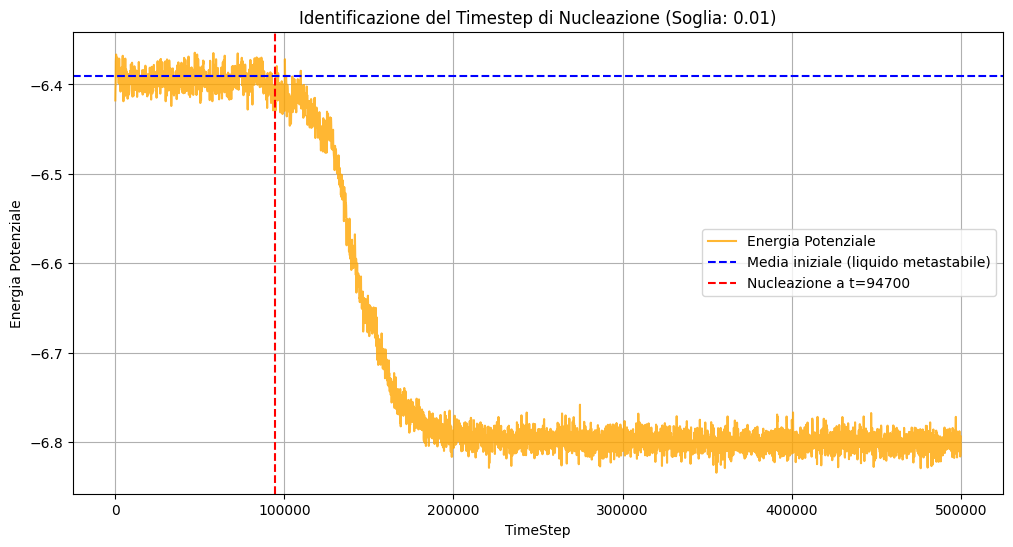

La nucleazione avviene al timestep: 94700.0


In [ ]:
# Percorso del file contenente i dati
file_path = "/content/drive/My Drive/progetto nucleazione/lalalamps/dati_50/pe_50/pe_nuc_4.dat"

# Caricamento dei dati
time_steps = []
energies = []

with open(file_path, 'r') as f:
    for line in f:
        if line.strip().startswith('#') or len(line.strip()) == 0:
            continue
        parts = line.split()
        if len(parts) == 2:
            time_steps.append(float(parts[0]))
            energies.append(float(parts[1]))

time_steps = np.array(time_steps)
energies = np.array(energies)

# Parametri per l'identificazione della nucleazione
energy_threshold = 0.01  # Cambia la soglia se necessario
window_size = 100  # Finestra per la media mobile

# Calcolo della media iniziale (liquido metastabile)
initial_mean = np.mean(energies[:window_size])

# Identifica il primo punto in cui l'energia scende al di sotto della soglia rispetto alla media iniziale
nucleation_index = None
for i in range(window_size, len(energies)):
    local_mean = np.mean(energies[i-window_size:i])
    if abs(local_mean - initial_mean) > energy_threshold:
        nucleation_index = i
        break

# Trova il timestep corrispondente alla nucleazione
nucleation_time = time_steps[nucleation_index] if nucleation_index else None

# Visualizzazione del risultato
plt.figure(figsize=(12, 6))
plt.plot(time_steps, energies, label="Energia Potenziale", color="orange", alpha=0.8)
plt.axhline(y=initial_mean, color='blue', linestyle='--', label="Media iniziale (liquido metastabile)")
if nucleation_time:
    plt.axvline(x=nucleation_time, color='red', linestyle='--', label=f'Nucleazione a t={nucleation_time:.0f}')
plt.xlabel("TimeStep")
plt.ylabel("Energia Potenziale")
plt.title(f"Identificazione del Timestep di Nucleazione (Soglia: {energy_threshold})")
plt.legend()
plt.grid(True)
plt.show()

# Stampare il risultato
if nucleation_time:
    print(f"La nucleazione avviene al timestep: {nucleation_time}")
else:
    print("Non è stato possibile identificare un evento di nucleazione con la soglia specificata.")

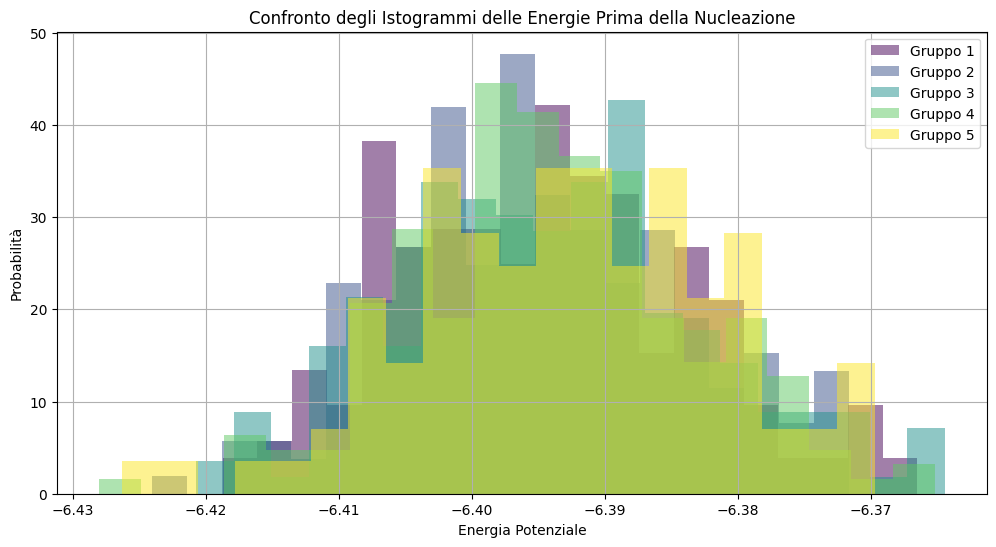

Confronto delle distribuzioni tra sottogruppi:
Gruppo 1 vs Gruppo 2: KS Statistic = 0.065, p-value = 0.793
Gruppo 2 vs Gruppo 3: KS Statistic = 0.085, p-value = 0.466
Gruppo 3 vs Gruppo 4: KS Statistic = 0.060, p-value = 0.866
Gruppo 4 vs Gruppo 5: KS Statistic = 0.120, p-value = 0.285


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

# Caricamento dei dati
data_path = "/content/drive/My Drive/progetto nucleazione/lalalamps/dati_50/pe_50/pe_nuc_1.dat"
data = np.loadtxt(data_path, skiprows=1)  # Salta la prima riga di intestazione
time_steps = data[:, 0]
energies = data[:, 1]

# Parametri
nucleation_time = nucleation_time  # Sostituisci con il valore trovato precedentemente
time_window = 20000  # Intervallo temporale per il confronto degli istogrammi

# Seleziona i dati prima del tempo di nucleazione
pre_nucleation_indices = time_steps < nucleation_time
pre_nucleation_times = time_steps[pre_nucleation_indices]
pre_nucleation_energies = energies[pre_nucleation_indices]

# Dividi i dati in sottogruppi basati su time_window
subgroup_energies = []
for start_time in range(int(pre_nucleation_times[0]), int(pre_nucleation_times[-1]), time_window):
    indices = (pre_nucleation_times >= start_time) & (pre_nucleation_times < start_time + time_window)
    subgroup_energies.append(pre_nucleation_energies[indices])

# Visualizza gli istogrammi per i sottogruppi
plt.figure(figsize=(12, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(subgroup_energies)))
for i, energies_group in enumerate(subgroup_energies):
    plt.hist(energies_group, bins=20, density=True, alpha=0.5, label=f'Gruppo {i+1}', color=colors[i])

plt.xlabel("Energia Potenziale")
plt.ylabel("Probabilità")
plt.title("Confronto degli Istogrammi delle Energie Prima della Nucleazione")
plt.legend()
plt.grid(True)
plt.show()

# Test di Kolmogorov-Smirnov per confrontare le distribuzioni tra gruppi
print("Confronto delle distribuzioni tra sottogruppi:")
for i in range(len(subgroup_energies) - 1):
    stat, p_value = ks_2samp(subgroup_energies[i], subgroup_energies[i+1])
    print(f"Gruppo {i+1} vs Gruppo {i+2}: KS Statistic = {stat:.3f}, p-value = {p_value:.3f}")


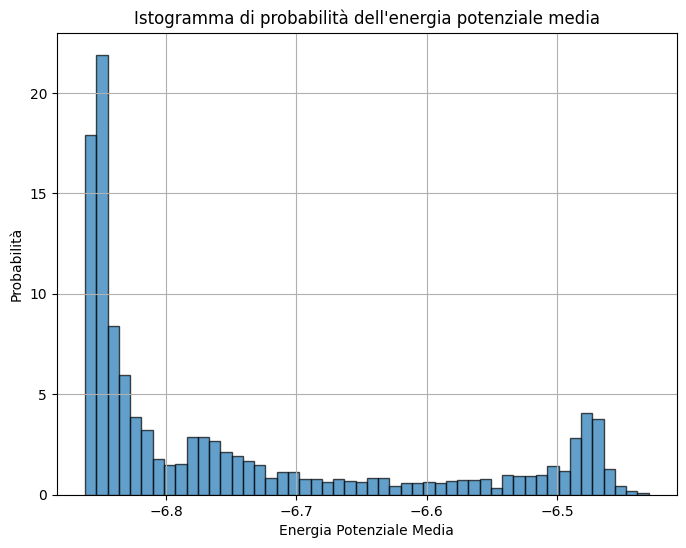

In [ ]:
# ISTOGRAMMA
# Trova tutti i file delle repliche
file_list = glob.glob("./dati_50/pe_50/pe_nuc*.dat")
file_list.sort()  # facoltativo, per avere un ordine definito

replica_data = []  # lista di array, uno per replica

for fname in file_list:
    timesteps = []
    energies = []
    with open(fname, 'r') as f:
        for line in f:
            if line.strip().startswith('#'):
                continue
            parts = line.split()
            if len(parts) == 2:
                t = float(parts[0])
                energy = float(parts[1])
                timesteps.append(t)
                energies.append(energy)
    timesteps = np.array(timesteps)
    energies = np.array(energies)
    replica_data.append((timesteps, energies))

# Ora replica_data è popolato e puoi calcolare min_length
min_length = min([len(rep[0]) for rep in replica_data])

# Tronca tutti i dati alla lunghezza minima
for i in range(len(replica_data)):
    timesteps_i, energies_i = replica_data[i]
    timesteps_i = timesteps_i[:min_length]
    energies_i = energies_i[:min_length]
    replica_data[i] = (timesteps_i, energies_i)

# Ora i timesteps sono uguali per tutte le repliche
base_timesteps = replica_data[0][0]
for i in range(1, len(replica_data)):
    if not np.allclose(base_timesteps, replica_data[i][0]):
        raise ValueError("I timestep non corrispondono ancora tra le repliche.")

# Estrai gli array di energie
all_energies = np.array([rep[1] for rep in replica_data])
mean_energies = np.mean(all_energies, axis=0)

# Creiamo l'istogramma dell'energia media
num_bins = 50  # Numero di bin modificabile
plt.figure(figsize=(8,6))
plt.hist(mean_energies, bins=num_bins, density=True, alpha=0.7, edgecolor='black')

plt.xlabel('Energia Potenziale Media')
plt.ylabel('Probabilità')
plt.title('Istogramma di probabilità dell\'energia potenziale media')
plt.grid(True)
plt.show()


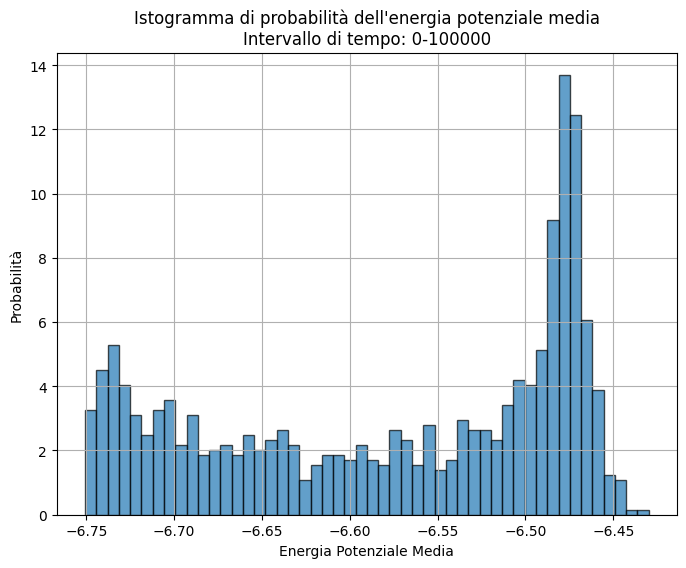

In [ ]:
import glob
import numpy as np
import matplotlib.pyplot as plt

# ISTOGRAMMA
# Trova tutti i file delle repliche
file_list = glob.glob("./dati_50/pe_50/pe_nuc*.dat")
file_list.sort()  # facoltativo, per avere un ordine definito

replica_data = []  # lista di array, uno per replica

for fname in file_list:
    timesteps = []
    energies = []
    with open(fname, 'r') as f:
        for line in f:
            if line.strip().startswith('#'):
                continue
            parts = line.split()
            if len(parts) == 2:
                t = float(parts[0])
                energy = float(parts[1])
                timesteps.append(t)
                energies.append(energy)
    timesteps = np.array(timesteps)
    energies = np.array(energies)
    replica_data.append((timesteps, energies))

# Ora replica_data è popolato e puoi calcolare min_length
min_length = min([len(rep[0]) for rep in replica_data])

# Tronca tutti i dati alla lunghezza minima
for i in range(len(replica_data)):
    timesteps_i, energies_i = replica_data[i]
    timesteps_i = timesteps_i[:min_length]
    energies_i = energies_i[:min_length]
    replica_data[i] = (timesteps_i, energies_i)

# Ora i timesteps sono uguali per tutte le repliche
base_timesteps = replica_data[0][0]
for i in range(1, len(replica_data)):
    if not np.allclose(base_timesteps, replica_data[i][0]):
        raise ValueError("I timestep non corrispondono ancora tra le repliche.")

# Seleziona un intervallo di tempo
start_time = 0
end_time = 100000

# Filtra i dati in base all'intervallo di tempo
filtered_energies = []
for timesteps, energies in replica_data:
    mask = (timesteps >= start_time) & (timesteps <= end_time)
    filtered_energies.append(energies[mask])

# Converte in array e calcola la media
all_energies = np.array(filtered_energies)
mean_energies = np.mean(all_energies, axis=0)

# Creiamo l'istogramma dell'energia media
num_bins = 50  # Numero di bin modificabile
plt.figure(figsize=(8,6))
plt.hist(mean_energies, bins=num_bins, density=True, alpha=0.7, edgecolor='black')

plt.xlabel('Energia Potenziale Media')
plt.ylabel('Probabilità')
plt.title(f'Istogramma di probabilità dell\'energia potenziale media\nIntervallo di tempo: {start_time}-{end_time}')
plt.grid(True)
plt.show()
